<a href="https://colab.research.google.com/github/deepa861/movie-observationneuralnetwork/blob/master/observations_for_movie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# Read the dataset
import pandas as pd
df = pd.read_csv("https://trello-attachments.s3.amazonaws.com/5e7463ee5b8a1136dc343165/5e7df7914a753004593104b2/ef9d84480fd32f49267c6a00fa185d79/MovieObservation.csv")
df.head(5)

,Wheather,Car,Friends,Output,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,0,0,0,0,NaN,NaN,NaN
1,0,0,1,1,NaN,NaN,NaN
2,0,1,0,1,NaN,NaN,NaN
3,0,1,1,1,NaN,NaN,NaN
4,1,0,0,0,NaN,NaN,NaN


In [6]:
df.columns
df = df[['Wheather', 'Car', 'Friends', 'Output']]
df

,Wheather,Car,Friends,Output
0,0,0,0,0
1,0,0,1,1
2,0,1,0,1
3,0,1,1,1
4,1,0,0,0
5,1,0,1,1
6,1,1,0,1
7,1,1,1,1


In [8]:
# Download the Visual Animator
!git clone https://github.com/jzliu-100/visualize-neural-network.git

Cloning into 'visualize-neural-network'...
remote: Enumerating objects: 61, done.
remote: Total 61 (delta 0), reused 0 (delta 0), pack-reused 61
Unpacking objects: 100% (61/61), done.


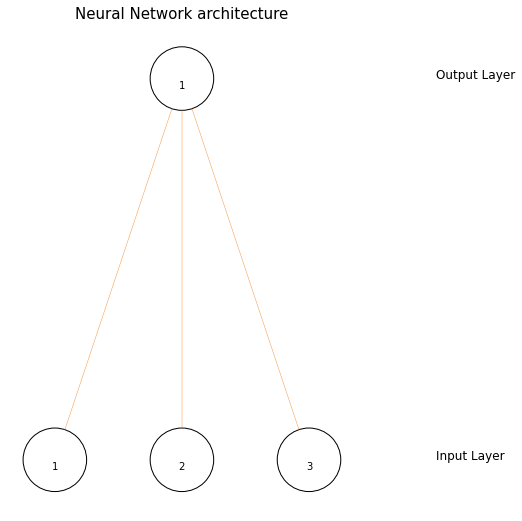

In [10]:
import VisualizeNN as VisN
neural_network = VisN.DrawNN([3,1]) 
neural_network.draw()

In [11]:
# Read the dependent and independent variables
# Dependent = Predictable (Output)
# Independent = Using the variable for prediction (Input)

df.columns
X = df[['Wheather', 'Car', 'Friends']] # Input
Y = df["Output"] # Output

In [12]:
X

,Wheather,Car,Friends
0,0,0,0
1,0,0,1
2,0,1,0
3,0,1,1
4,1,0,0
5,1,0,1
6,1,1,0
7,1,1,1


In [13]:
X = X.to_numpy()
Y = Y.to_numpy()
Y = Y.T # Transpose from horizontal to vertical order
Y = Y.reshape(-1,1)
Y

array([[0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1]])

In [14]:
# Design a custom neural network 
from numpy import random, exp, dot
class MyNeuralNetwork:
  def __init__(self):
    random.seed(1)
    # we need positive influence (1), negative influence (-1), Neutral (0) (weights)
    # -1 to 1 
    self.weights =  2 * random.random((3,1)) - 1
  
  def sigmoid(self, x):
    return 1 / (1 + exp(-x)) # Normalize the value between 0 to 1 -> Neuron

  def sigmoid_derivative(self, x):
    return x * (1 - x) # output * ( 1 - output )

  def train(self, x, y, num_iter):
    for i in range(num_iter):
      output = self.sigmoid(dot(x,self.weights))
      print("Sigmoid generated: ", output)
      error = y - output
      print("Error identified:", error)
      adjustment = dot(x.T, (error * self.sigmoid_derivative(output))) # deep learning = (input * error * sig_der)
      print("Adjustment identified:", adjustment)
      self.weights += adjustment
      print("Weights:", self.weights)
  
  def predict(self, x):
    return self.sigmoid(dot(x, self.weights))

if __name__ == "__main__":
  neu_net = MyNeuralNetwork()
  neu_net.train(X, Y, 10000) #no of iteration =1000
 # neu_net.train(X,Y,1)
  print(neu_net.predict([0,0,1])) #wheather bad,friends no and car ready

Streaming output truncated to the last 5000 lines.
 [ 1.06248113e-04]]
Weights: [[-4.09153217]
 [ 8.65097622]
 [ 8.65097478]]
Sigmoid generated:  [[0.5       ]
 [0.99982507]
 [0.99982507]
 [0.99999997]
 [0.01643885]
 [0.98964055]
 [0.98964056]
 [0.99999817]]
Error identified: [[-5.00000000e-01]
 [ 1.74925616e-04]
 [ 1.74925366e-04]
 [ 3.06096344e-08]
 [-1.64388533e-02]
 [ 1.03594504e-02]
 [ 1.03594357e-02]
 [ 1.83141685e-06]]
Adjustment identified: [[-5.33809141e-05]
 [ 1.06236752e-04]
 [ 1.06237052e-04]]
Weights: [[-4.09158555]
 [ 8.65108245]
 [ 8.65108102]]
Sigmoid generated:  [[0.5       ]
 [0.99982509]
 [0.99982509]
 [0.99999997]
 [0.01643799]
 [0.98964109]
 [0.98964111]
 [0.99999817]]
Error identified: [[-5.00000000e-01]
 [ 1.74907037e-04]
 [ 1.74906786e-04]
 [ 3.06031314e-08]
 [-1.64379902e-02]
 [ 1.03589086e-02]
 [ 1.03588939e-02]
 [ 1.83112551e-06]]
Adjustment identified: [[-5.33753432e-05]
 [ 1.06225694e-04]
 [ 1.06225994e-04]]
Weights: [[-4.09163893]
 [ 8.65118868]
 [ 8.65118

In [15]:
neu_net.weights

array([[-4.10350893],
       [ 8.67481262],
       [ 8.67481126]])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


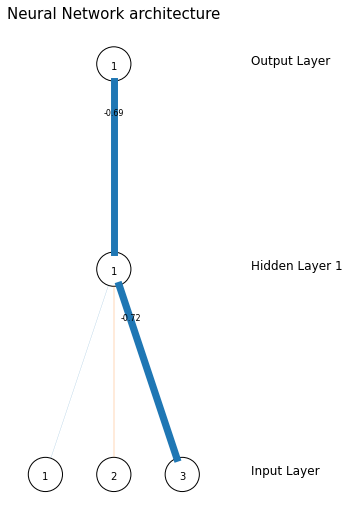

In [16]:
import numpy as np
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(1,), activation="logistic", tol=0.001, max_iter=100, random_state=1)
classifier.fit(X, Y)

neural_arch = np.hstack(([X.shape[1]], np.asarray(classifier.hidden_layer_sizes), [Y.shape[1]]))
network = VisN.DrawNN(neural_arch, classifier.coefs_)
network.draw()